In [115]:
import numpy as np
import xarray as xr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [116]:
datadir = "../data/"
ds = xr.open_dataset(datadir + "floats.nc")
ds

<xarray.Dataset>
Dimensions:  (column: 1267240, segment: 3091)
Dimensions without coordinates: column, segment
Data variables:
    expid    (segment) float64 ...
    typeid   (segment) float64 ...
    id       (segment) float64 ...
    num      (column) float64 ...
    lat      (column) float64 ...
    lon      (column) float64 ...
    u        (column) float64 ...
    v        (column) float64 ...
    p        (column) float64 ...
    t        (column) float64 ...
    filled   (column) float64 ...
Attributes:
    title:      FLOATS.NC subsurface float dataset
    link:       http://www.aoml.noaa.gov/phod/float_traj/data.php
    about:      For more information, see ABOUT_FLOATS.M.
    note:       In Matlab, try 'ncload floats' using jLab routine ncload.
    creator:    J. M. Lilly
    timestamp:  13-Jan-2019 16:46:27

In [93]:
"""print(ds.expid.values.shape)
print(ds.typeid.values.shape)
print(ds.id.values.shape)
print(ds.num.values.shape)

print(ds.lat.values.shape)
print(ds.lon.values.shape)
print(ds.u.values.shape)
print(ds.v.values.shape)
print(ds.p.values.shape)
print(ds.t.values.shape)
print(ds.filled.values.shape)"""



data_vars = []
for var in list(ds.data_vars)[3:]:
    data_var = []
    j = 0
    for i in np.where(np.isnan(ds[var]))[0]:
        data_var.append(ds[var].values[j:i])
        j = i + 1
    data_vars.append(data_var)

data_vars = list(map(list, zip(*data_vars)))


index1 = []
index2 = []
for i in range(len(data_vars)):
    index1 += list(np.ones_like(data_vars[i][0], dtype=int) + i)
    index2 += [dt.datetime.fromordinal(int(j)) + dt.timedelta(days=j%1) - dt.timedelta(days = 366) for j in data_vars[i][0]]
index = [index1, index2]
index = pd.MultiIndex.from_arrays(index)


data_vars = []
for var in list(ds.data_vars)[3:]:
    data_var = []
    j = 0
    for i in np.where(np.isnan(ds[var]))[0]:
        data_var += list(ds[var].values[j:i])
        j = i + 1
    data_vars.append(data_var)
data_vars = list(map(list, zip(*data_vars)))

df = pd.DataFrame(data_vars, columns=list(ds.data_vars)[3:], index=index)
df.drop(columns=["num"], inplace=True)
df



    


lat        lon          u          v  \
1    1989-10-12 07:54:59.999991  29.712000 -75.464000   9.118282  13.227775   
     1989-10-12 15:50:59.999979  29.745972 -75.437026   3.420259   2.363412   
     1989-10-12 23:46:59.999966  29.724143 -75.443772  -2.810369  -4.666338   
     1989-10-13 07:42:59.999954  29.722001 -75.453651  -5.532094   2.481008   
     1989-10-13 15:38:59.999941  29.736886 -75.476498 -10.333772   1.568635   
...                                    ...        ...        ...        ...   
3091 1999-05-10 00:28:48.000002  49.386000 -23.311000   3.476496  -4.440190   
     1999-05-11 00:28:48.000002  49.353000 -23.272000   2.934365  -5.276766   
     1999-05-12 00:28:48.000002  49.304000 -23.241000   2.223514  -6.628070   
     1999-05-13 00:28:48.000002  49.250000 -23.219000   1.511599  -5.920180   
     1999-05-14 00:28:48.000002  49.212000 -23.205000   1.176123  -4.890626   

                                           p         t  filled  
1    1989-10-12 07:54:59.999991  2290.500000  3.859000     0.0  
     1989-10-12 15:50:59.999979  2551.572579  3.492275     0.0  
     1989-10-12 23:46:59.999966  2554.881333  3.473015     0.0  
     1989-10-13 07:42:59.999954  2563.985854  3.496760     0.0  
     1989-10-13 15:38:59.999941  2555.068166  3.501983     0.0  
...                                      ...       ...     ...  
3091 1999-05-10 00:28:48.000002  1463.400000  3.883000     0.0  
     1999-05-11 00:28:48.000002  1463.800000  3.873000     0.0  
     1999-05-12 00:28:48.000002  1464.100000  3.878000     0.0  
     1999-05-13 00:28:48.000002  1462.700000  3.873000     0.0  
     1999-05-14 00:28:48.000002  1462.700000  3.858000     0.0  

[1264149 rows x 7 columns]

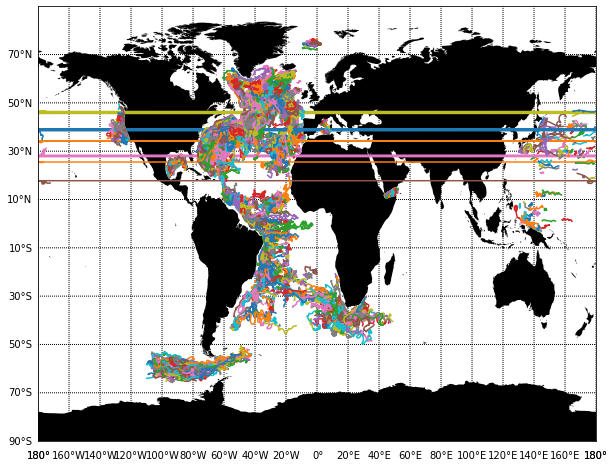

In [113]:
#print(df.loc[1, "lon"].loc[(df.loc[1, "lon"].min() + 1):(df.loc[1, "lon"].max() - 1)])

fig, ax = plt.subplots(1, 1, figsize=(10, 8))


map = Basemap(  ax=ax,
                llcrnrlon=-180, urcrnrlon=180,
                llcrnrlat=-90, urcrnrlat=90,
                projection="cyl",
                fix_aspect=False,
                resolution='l'
            )
map.fillcontinents(color="black", lake_color="black")
map.drawparallels(np.arange(-90, 90, 20), labels=[1, 0, 0, 0])
map.drawmeridians(np.arange(-180, 180, 20), labels=[1, 0, 0, 1])

for i in range(1, len(df.groupby(level=0)) + 1):
    x, y = map(df.loc[i, "lon"], df.loc[i, "lat"])
    ax.plot(x, y)

In [ ]:
ds = df.to_xarray()
ds